<a href="https://colab.research.google.com/github/vishant750/bike_sharing_demand_prediction/blob/main/Bike_sharing_demad_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>
###Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


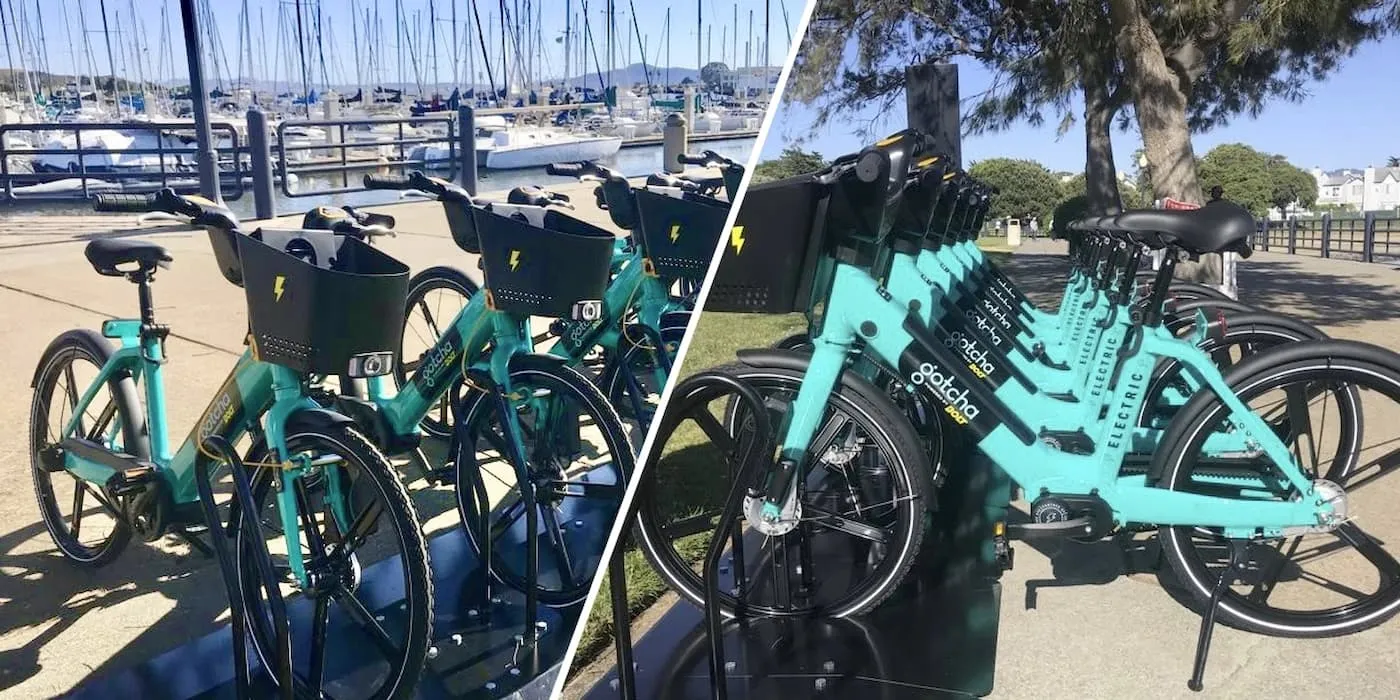





## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Project Flowchart:**



* ### Initial preparations(Loading the dependencies and the data)
* ### List item
* ### EDA
* ### Clean-Up
* ### Feature engineering
* ### Pre processing of the data
* ### Model implementation
* ### Model explainability


# **Initial Pre Processing**

In [ ]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Mounting the drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Loading the dataset
bike_sharing_df=pd.read_csv(r'C:\Users\91706\Downloads\SeoulBikeData (1).csv',encoding='unicode_escape')

# EDA

In [ ]:
#First five rows
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Last five rows
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#columns in dataset
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Statistical description
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Summary of the dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike_sharing_df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Checking for the unique values in the categorical columns
print('Season categorical column can take ',bike_sharing_df.Seasons.unique(),'unique values.')
print('Holiday categorical column can take-',bike_sharing_df.Holiday.unique(),'unique values.')

Season categorical column can take  ['Winter' 'Spring' 'Summer' 'Autumn'] unique values.
Holiday categorical column can take- ['No Holiday' 'Holiday'] unique values.


In [ ]:
bike_sharing_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Using group by to see analyse 'Season' categorial column effect on 'Rented Bike count'
bike_sharing_season_df=bike_sharing_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
bike_sharing_season_df.set_index('Seasons',inplace=True)
bike_sharing_season_df

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

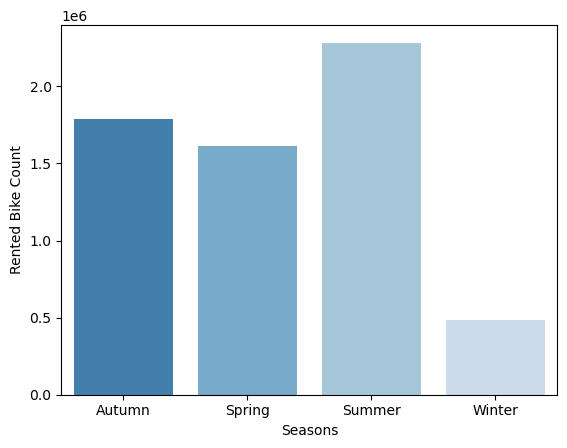

In [ ]:
#Visual analysis on 'Season' column
sns.barplot(x=bike_sharing_season_df.index,y=bike_sharing_season_df.columns[0],data=bike_sharing_season_df,palette='tab20c')

Text(0.5, 1.0, 'Percentage of total Bike Rented each year')

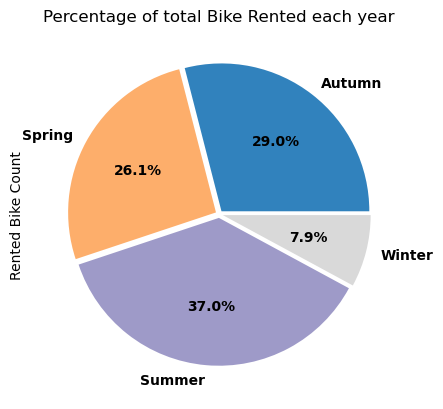

In [ ]:
bike_sharing_season_df['Rented Bike Count'].plot.pie(autopct='%2.1f%%',explode=[0.025]*4,textprops={'weight': 'bold'},cmap="tab20c")
plt.title('Percentage of total Bike Rented each year')

### Most of the bikes were rented in summer and lowest number of bikes were rented with winter.

In [ ]:
bike_sharing_df_holiday=bike_sharing_df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
bike_sharing_df_holiday

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


Text(0.5, 1.0, 'Holiday bike count')

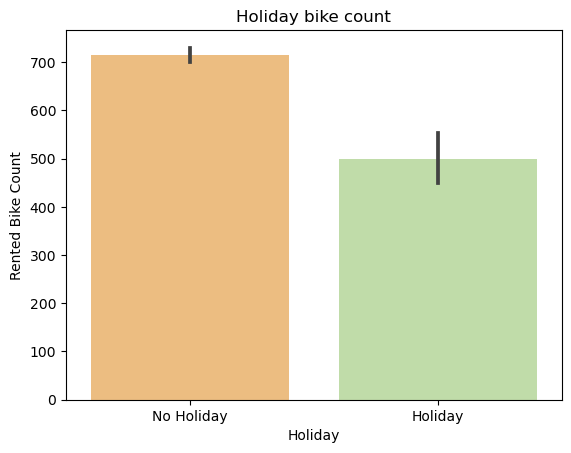

In [ ]:
sns.barplot(data=bike_sharing_df,x='Holiday',y='Rented Bike Count',palette='Spectral')
plt.title('Holiday bike count')

### We can see that most of the bikes are rented on Holidays which can mean that most of the people rent the bikes for commuting to work

## Analysis for different Temepratures

In [ ]:
bike_sharing_temp_df=bike_sharing_df.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()
bike_sharing_temp_df

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


Text(0.5, 1.0, 'Temperature vs Rented Bike Count')

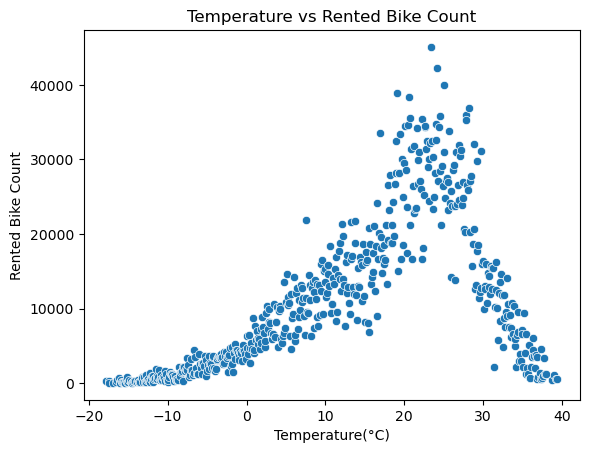

In [ ]:
sns.scatterplot(data=bike_sharing_temp_df,x='Temperature(°C)',y='Rented Bike Count')
plt.title('Temperature vs Rented Bike Count')


### We can see that most of the bikes are rented in the temprature range 20 to 30 degrees.

## Anaysis for Rainfall and Snowfall

In [ ]:
rented_bike_rainfall=bike_sharing_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum().reset_index()
rented_bike_rainfall.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


Text(0.5, 1.0, 'Number of Bikes rented in Rainfall ')

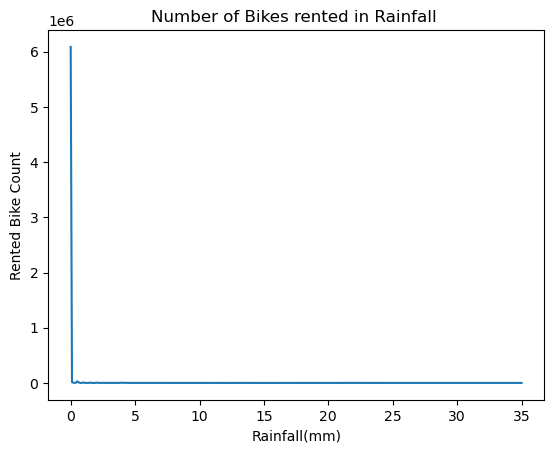

In [ ]:
sns.lineplot(data=rented_bike_rainfall,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of Bikes rented in Rainfall ')

In [ ]:
rented_bike_snowfall=bike_sharing_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum().reset_index()
rented_bike_snowfall.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


Text(0.5, 1.0, 'Number of Bikes rented in Snowfall ')

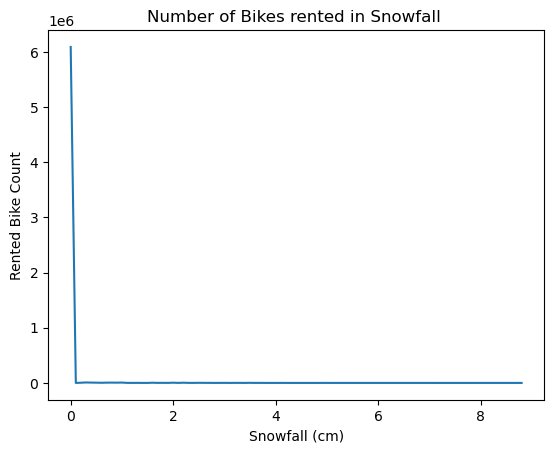

In [ ]:
sns.lineplot(data=rented_bike_snowfall,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of Bikes rented in Snowfall ')

### We can see that most bikes are rented when there is no rain or snowfall.

## Analysis for different humidity percentage

In [ ]:
bike_rented_humidity=bike_sharing_df.groupby('Humidity(%)')['Rented Bike Count'].sum().reset_index()
bike_rented_humidity.head()

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353


Text(0.5, 1.0, 'Number of Bikes rented in across differnt Humidity percentage ')

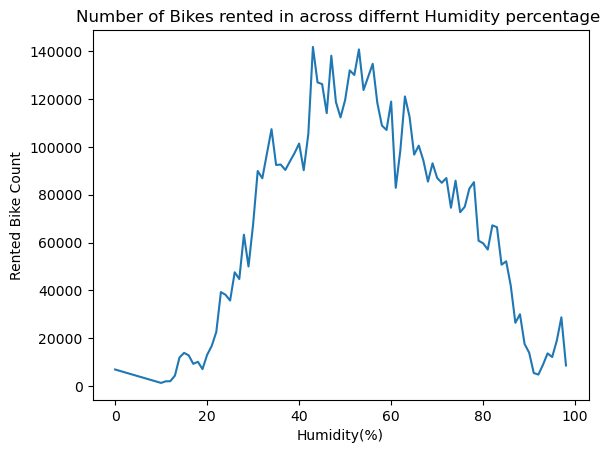

In [ ]:
sns.lineplot(data=bike_rented_humidity,x='Humidity(%)',y='Rented Bike Count')
plt.title('Number of Bikes rented in across differnt Humidity percentage ')

## Number of bikes rented at different hours

In [ ]:
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
bike_sharing_hourly=bike_sharing_df.groupby('Hour')['Rented Bike Count'].sum().reset_index()
bike_sharing_hourly.head()

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

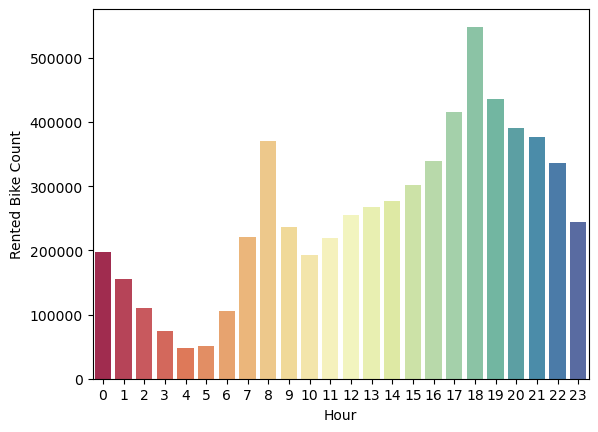

In [ ]:
sns.barplot(data=bike_sharing_hourly,x='Hour',y='Rented Bike Count',palette='Spectral')

### We can see that most of the bikes are rented at 18 hour i.e, 6 PM and lowest number of bikes were rented at 4 AM.

## Bike rented at different level of visibility

In [ ]:
bike_sharing_visibility=bike_sharing_df.groupby('Visibility (10m)')['Rented Bike Count'].sum().reset_index()
bike_sharing_visibility.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

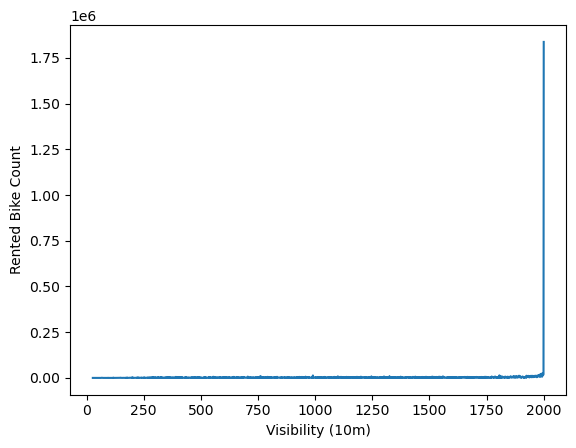

In [ ]:
sns.lineplot(data=bike_sharing_visibility,x='Visibility (10m)',y='Rented Bike Count')

### We can see that visibility is preffered by customer because with increasing visibility there is increase in rented bike count.

## Clean up

### Handling null values

Missing data is are values or data which has not been stored in the given dataset.

Missing values can bais the results of the machine learning models or reduce the accuracy of the model.

Therefore it is essential to remove null values from the dataset before training the model.

In [ ]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### We can see that there are no null values in the dataset.

## Handling Duplicates

When two features have the same set of values they are duplicated values.
Duplicate values can have depreciating effect on the accuracy, which is why it is essential to remove duplicated values.

In [ ]:
bike_sharing_df.duplicated().sum()

0

We can see that there are no duplicated values.